#**Nome**: Tiago Carlos Batista;
#**RA**: 11417838.

---

#Universidade Federal de São Carlos - UFSCar
#Departamento de Computação - DC



#Detecção de patologias cardíacas em pacientes pediátricos


---

##Este trabalho visa a utilização de técnicas de **aprendizado de máquina** para tentar alcançar uma solução satisfatória para o problema descrito anteriormente. A base utilizada se trata de uma dados reais, coletados no **Real Hospital Português** (RHP), localizado no Brasil.

#Carregamento dos dados

##As bases utilizadas foram armanzeadas em um repositório no *GitHub* para uma melhor experiência de manuseio, sem precisar fazer o upload delas todas as vezes que for necessário interagir com esse *notebook*.

In [1]:
import requests
import os
import zipfile

In [2]:
#Subi os arquivos em um repositório no GitHub para puxá-los automaticamente
url = "https://github.com/TiagoDeserth/ML-Projeto-Final/archive/refs/heads/main.zip"

In [3]:
#Nome do arquivo .zip a ser baixado
output_zip = "ML-Projeto-Final.zip"

In [4]:
#Download do arquivo .zip
response = requests.get(url)
with open(output_zip, "wb") as f:
    f.write(response.content)

In [5]:
#Criação da pasta para extrair o conteúdo
extract_dir = "ML-Projeto-Final"
os.makedirs(extract_dir, exist_ok=True)

In [6]:
#Descompactação do arquivo .zip
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

#Análise Exploratória

##O pontapé inicial se deu através do conhecimento de todas as bases e a nomeação de cada uma.

In [7]:
import pandas as pd

In [8]:
#Análise Exploratória
Base_Principal = pd.read_csv("ML-Projeto-Final/ML-Projeto-Final-main/RHP_data.csv")
Base_Principal.head()

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,23/01/09,24/10/99,9.6,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


In [9]:
print(Base_Principal['Peso'].dtype)
print(Base_Principal['Altura'].dtype)
print(Base_Principal['IMC'].dtype)
print(Base_Principal['PA SISTOLICA'].dtype)
print(Base_Principal['PA DIASTOLICA'].dtype)
print(Base_Principal['FC'].dtype)
print(Base_Principal['IDADE'].dtype)

float64
int64
float64
float64
float64
object
object


In [10]:
#Análise Exploratória
Base_Treino = pd.read_csv("ML-Projeto-Final/ML-Projeto-Final-main/train.csv")
Base_Treino.head()

,Id,CLASSE
0,10524,Normal
1,17249,Anormal
2,4483,Anormal
3,6830,Normal
4,11652,Normal


In [11]:
#Análise Exploratória
Base_Teste = pd.read_csv("ML-Projeto-Final/ML-Projeto-Final-main/test.csv")
Base_Teste.head()

,Id
0,8957
1,4246
2,9089
3,10606
4,9863


##Coluna `['Peso']`

###Na **análise exploratória**, se faz necessário já informar que as práticas foram praticamente as mesmas em todas as colunas: verificação de registros **NaN** ou **negativos**. Claro, outras verificações também foram exploradas, que serão explicadas posteriormente.

*   Verificação de registros **NaN**;
*   Verificação de registros **negativos**.





In [12]:
#Análise Exploratória
Valores_NaN_Peso = Base_Principal["Peso"].isna().sum()
print(Valores_NaN_Peso)

318


In [13]:
#Análise Exploratória
Valores_Negativos_Peso = Base_Principal[Base_Principal["Peso"] < 0]
Quantidade_Negativos_Peso = len(Valores_Negativos_Peso)
print(Quantidade_Negativos_Peso)

1


## Coluna `['Altura']`



*   Verificação de registros **NaN**;
*   Verificação de registros **negativos**.



In [14]:
#Análise Exploratória
Valores_NaN_Altura = Base_Principal["Altura"].isna().sum()
print(Valores_NaN_Altura)

0


In [15]:
#Análise Exploratória
Valores_Negativos_Altura = Base_Principal[Base_Principal["Altura"] < 0]
Quantidade_Negativos_Altura = len(Valores_Negativos_Altura)
print(Quantidade_Negativos_Altura)

0


##Coluna `['IMC']`

*   Verificação de registros **NaN**;
*   Verificação de registros **negativos**.

In [16]:
#Análise Exploratória
Valores_Negativos_IMC = Base_Principal[Base_Principal["IMC"] < 0]
Quantidade_Negativos_IMC = len(Valores_Negativos_IMC)
print(Quantidade_Negativos_IMC)

0


In [17]:
#Análise Exploratória
Valores_NaN_IMC = Base_Principal["IMC"].isna().sum()
print(Valores_NaN_IMC)

4727


##Coluna `['Atendimento']`

*   Verificação de registros **NaN**;
*   Verificação do **tipo do dado** da coluna;
*   Verificação dos **valores únicos** da coluna.

In [18]:
#Análise Exploratória
Valores_NaN_Atendimento = Base_Principal["Atendimento"].isna().sum()
print(Valores_NaN_Atendimento)

983


In [19]:
#Análise Exploratória
print(Base_Principal['Atendimento'].dtype)

object


In [20]:
#Análise Exploratória
print(Base_Principal["Atendimento"].unique())

['11/05/06' '25/05/05' '12/06/01' ... '38313' '25/05/10' '40147']


In [21]:
#Análise Exploratória
print(Base_Principal["Atendimento"].isna().sum())

983


##Coluna `['DN']`

*   Verificação de registros **NaN**;
*   Verificação do **tipo do dado** da coluna.



In [22]:
#Análise Exploratória
Valores_NaN_DN = Base_Principal["DN"].isna().sum()
print(Valores_NaN_DN)

1376


In [23]:
#Análise Exploratória
print(Base_Principal['DN'].dtype)

object


In [24]:
#Análise Exploratória
print(Base_Principal["DN"].isna().sum())

1376


##Coluna `['IDADE']`

*   Verificação de registros **NaN**;
*   Verificação do **tipo do dado** da coluna;
*   Verificação de registros **negativos**.

In [25]:
#Análise Exploratória
Valores_NaN_IDADE = Base_Principal["IDADE"].isna().sum()
print(Valores_NaN_IDADE)

1376


In [26]:
#Análise Exploratória
print(Base_Principal['IDADE'].dtype)

object


In [27]:
#Pré-processamento e Análise Exploratória
#Converter a coluna "IDADE" para numérico, forçando erros a se tornarem NaN
Base_Principal["IDADE"] = pd.to_numeric(Base_Principal["IDADE"], errors='coerce')

In [28]:
#Análise Exploratória
Valores_Negativos_IDADE = Base_Principal[Base_Principal["IDADE"] < 0]
Quantidade_Negativos_IDADE = len(Valores_Negativos_IDADE)
print(Quantidade_Negativos_IDADE)

122


In [29]:
#Análise Exploratória
Valores_NaN_IDADE = Base_Principal["IDADE"].isna().sum()
print(Valores_NaN_IDADE)

1496


##Coluna `['PULSOS']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação do **tipo do dado** da coluna;
*   Verificação de registros **NaN**.

In [30]:
#Análise Exploratória
print(Base_Principal["PULSOS"].unique())

['Normais' nan 'NORMAIS' 'Outro' 'Amplos' 'AMPLOS' 'Femorais diminuidos'
 'Diminuídos ']


In [31]:
#Análise Exploratória
print(Base_Principal['PULSOS'].dtype)

object


In [32]:
#Análise Exploratória
Valores_NaN_PULSOS = Base_Principal["PULSOS"].isna().sum()
print(Valores_NaN_PULSOS)

1198


##Coluna `['PA SISTOLICA']`

*   Verificação de registros **NaN**;
*   Verificação de registros **negativos**.

In [33]:
#Análise Exploratória
Valores_NaN_PA_SISTOLICA = Base_Principal["PA SISTOLICA"].isna().sum()
print(Valores_NaN_PA_SISTOLICA)

7730


In [34]:
#Análise Exploratória
Valores_Negativos_PA_SISTOLICA = Base_Principal[Base_Principal["PA SISTOLICA"] < 0]
Quantidade_Negativos_PA_SISTOLICA = len(Valores_Negativos_PA_SISTOLICA)
print(Quantidade_Negativos_PA_SISTOLICA)

0


##Coluna `['PA DIASTOLICA']`

*   Verificação de registros **NaN**;
*   Verificação de registros **negativos**.

In [35]:
#Análise Exploratória
Valores_NaN_PA_DIASTOLICA = Base_Principal["PA DIASTOLICA"].isna().sum()
print(Valores_NaN_PA_DIASTOLICA)

7740


In [36]:
#Análise Exploratória
Valores_Negativos_PA_DIASTOLICA = Base_Principal[Base_Principal["PA DIASTOLICA"] < 0]
Quantidade_Negativos_PA_DIASTOLICA = len(Valores_Negativos_PA_DIASTOLICA)
print(Quantidade_Negativos_PA_DIASTOLICA)

0


##Coluna `['PPA']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação de registros **NaN**.

In [37]:
#Análise Exploratória
print(Base_Principal["PPA"].unique())

['Não Calculado' 'Normal' 'Pre-Hipertensão PAS' 'HAS-2 PAS'
 'Pre-Hipertensão PAD' nan '#VALUE!' 'HAS-1 PAS' 'HAS-2 PAD' 'HAS-1 PAD']


In [38]:
#Análise Exploratória
Valores_NaN_PPA = Base_Principal["PPA"].isna().sum()
print(Valores_NaN_PPA)

217


##Coluna `['B2']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação de registros **NaN**;
*   Verificação do **tipo do dado** da coluna.

In [39]:
#Análise Exploratória
print(Base_Principal["B2"].unique())

['Normal' 'Desdob fixo' 'Outro' 'Hiperfonética' nan 'Única']


In [40]:
#Análise Exploratória
Valores_NaN_B2 = Base_Principal["B2"].isna().sum()
print(Valores_NaN_B2)

1179


In [41]:
#Análise Exploratória
print(Base_Principal['B2'].dtype)

object


##Coluna `['SOPRO']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação de registros **NaN**;
*   Verificação do **tipo do dado** da coluna.

In [42]:
#Análise Exploratória
print(Base_Principal["SOPRO"].unique())

['Sistólico' 'ausente' 'sistólico' nan 'contínuo' 'Contínuo' 'diastólico'
 'Sistolico e diastólico']


In [43]:
#Análise Exploratória
Valores_NaN_SOPRO = Base_Principal["SOPRO"].isna().sum()
print(Valores_NaN_SOPRO)

1167


In [44]:
#Análise Exploratória
print(Base_Principal['SOPRO'].dtype)

object


##Coluna `['FC']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação do **tipo do dado** da coluna;
*   Verificação de registros **NaN**.



In [45]:
#Análise Exploratória
print(Base_Principal['FC'].dtype)

object


In [46]:
#Análise Exploratória
print(Base_Principal["FC"].unique())

['112' '128' '88' '92' '90' '100' '96' '80' '120' '110' '52' '95' '70'
 '78' '84' '85' '132' '76' '102' '72' nan '74' '140' '68' '108' '136' '86'
 '60' '82' '75' '64' '130' '200' '124' '160' '94' '164' '152' '1120' '98'
 '150' '116' '104' '180' '156' '135' '123' '106' '300' '10' '115' '55'
 '65' '142' '170-150' '50' '134' '780' '92-100' '200-300' '62' '12' '198'
 '144' '140-150' '111' '148' '66' '83' '8096' '972' '56' '137' '126' '114'
 '122' '900' '125' '80-90' '182' '89' '58' '69' '170' '57' '801' '50-100'
 '79' '981' '165' '230' '138' '87' '93' '145' '133' '43' '1560'
 '156 a 168' '16' '146' '118' '214' '99' '65-100' '140-160' '194'
 '120-180' '48' '107' '60-100' '154' '97' '140-200' '109' '188' '192'
 '129' '140-120' '9288' '66-80' '81' '8' '105' '91' '120-160' '143' '73']


In [47]:
#Análise Exploratória
Valores_NaN_FC = Base_Principal["FC"].isna().sum()
print(Valores_NaN_FC)

2041


##Coluna `['HDA 1']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação de registros **NaN**.

In [48]:
#Análise Exploratória
print(Base_Principal["HDA 1"].unique())

['Palpitacao' 'Dispneia' 'Assintomático' nan 'Dor precordial'
 'Desmaio/tontura' 'Outro' 'Cianose' 'Ganho de peso']


In [49]:
#Análise Exploratória
Valores_NaN_HDA1 = Base_Principal["HDA 1"].isna().sum()
print(Valores_NaN_HDA1)

5414


##Coluna `['HDA2']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação de registros **NaN**;
*   Verificação do **tipo do dado** da coluna.

In [50]:
#Análise Exploratória
print(Base_Principal["HDA2"].unique())

[nan 'Dispneia' 'Palpitacao' 'Desmaio/tontura' 'Ganho de peso' 'Outro'
 'Dor precordial' 'Assintomático' 'Cianose']


In [51]:
#Análise Exploratória
Valores_NaN_HDA2 = Base_Principal["HDA2"].isna().sum()
print(Valores_NaN_HDA2)

17221


In [52]:
#Análise Exploratória
print(Base_Principal['HDA2'].dtype)

object


##Coluna `['SEXO']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação do **tipo do dado** da coluna.
*   Verificação de registros **NaN**.

In [53]:
#Análise Exploratória
print(Base_Principal["SEXO"].unique())

['M' 'F' 'Indeterminado' nan 'Masculino' 'Feminino' 'masculino']


In [54]:
#Análise Exploratória
print(Base_Principal['SEXO'].dtype)

object


In [55]:
#Análise Exploratória
Valores_NaN_SEXO = Base_Principal["SEXO"].isna().sum()
print(Valores_NaN_SEXO)

4


##Coluna `['MOTIVO1']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação de registros **NaN**.

In [56]:
#Análise Exploratória
print(Base_Principal["MOTIVO1"].unique())

['6 - Suspeita de cardiopatia' '2 - Check-up' '5 - Parecer cardiológico'
 '1 - Cardiopatia já estabelecida' nan '7 - Outro']


In [57]:
#Análise Exploratória
Valores_NaN_MOTIVO1 = Base_Principal["MOTIVO1"].isna().sum()
print(Valores_NaN_MOTIVO1)

1097


##Coluna `['MOTIVO2']`

*   Verificação dos **valores únicos** da coluna;
*   Verificação de registros **NaN**.


In [58]:
#Análise Exploratória
print(Base_Principal["MOTIVO2"].unique())

['6 - Palpitação/taquicardia/arritmia' '6 - Dispnéia' nan
 '5 - Atividade física' '5 - Cirurgia' '6 - Sopro'
 '1 - Cardiopatia adquirida' '1 - Cardiopatia congenica'
 '6 - Dor precordial' '6 - HAS/dislipidemia/obesidade' '6 - Cianose'
 'Outro' '6 - Alterações de pulso/perfusão' '6 - Cardiopatia na familia'
 '6 - Cansaço' '5 - Uso de cisaprida' '6 - Cianose e dispnéia']


In [59]:
#Análise Exploratória
Valores_NaN_MOTIVO2 = Base_Principal["MOTIVO2"].isna().sum()
print(Valores_NaN_MOTIVO2)

4778


#Pré-processamento

##O mesmo esquema de exibição de amostragem construído na "*Análise Exploratória*" será seguido nesta seção, organizando os processamentos por **COLUNA**.

##Coluna `['Peso']`

###Importante destacar que foi adotado a prática de **NÃO EXCLUIR NENHUM REGISTRO** da base de dados. Portanto, as técnicas de processamento de dados utilizadas tanto nesta **coluna**, como nas outras, foram pensadas para justamente tentar **contornar** esse ponto destacado.

###Nesta coluna, `['Peso']`, a primeira operação foi feita através da troca dos valores **negativos** por **NaN**.

In [60]:
#Pré-processamento
#Substituindo o valor negativo por NaN
Base_Principal['Peso'] = Base_Principal['Peso'].apply(lambda x: None if x < 0 else x)

In [61]:
#Pré-processamento e Análise Exploratória
Valores_Negativos_Peso = Base_Principal[Base_Principal["Peso"] < 0]
Quantidade_Negativos_Peso = len(Valores_Negativos_Peso)
print(Quantidade_Negativos_Peso)

0


###Posteriormente, os valores **NaN** foram alterados para a **mediana** da coluna.

In [62]:
#Pré-processamento
Mediana_Peso = Base_Principal["Peso"].median()
Base_Principal["Peso"] = Base_Principal["Peso"].fillna(Mediana_Peso)

In [63]:
#Pré-processamento Análise Exploratória
print(Base_Principal["Peso"].isnull().sum())

0


###Uma verificação também foi feita para **detectar registros com valor** **0** (**zero**) da coluna `['Peso']`, que será importante para o processamento de outra coluna da base de dados.

In [64]:
#Análise Exploratória
Valores_Zero_Peso = Base_Principal[Base_Principal["Peso"] == 0]
Quantidade_Zero_Peso = len(Valores_Zero_Peso)
print(Quantidade_Zero_Peso)

2609


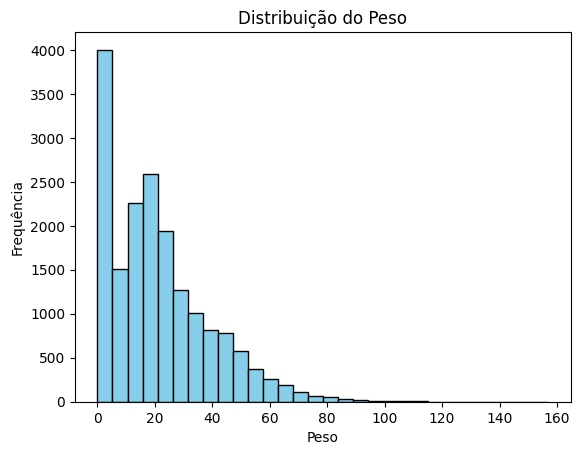

In [65]:
#Análise Exploratória
import matplotlib.pyplot as plt

#Histograma para visualizar a distribuição do "Peso"
plt.hist(Base_Principal['Peso'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Peso')
plt.xlabel('Peso')
plt.ylabel('Frequência')
plt.show()

##Coluna `['Altura']`

###Como esta coluna não possui registros NaN e nem negativos, aqui foi feito somente uma operação de "*Análise Exploratória*" que também é a detecção de registros zerados e que também será muito importante para o **pré-processamento** de uma coluna a seguir.

In [66]:
#Análise Exploratória
Valores_Zero_Altura = Base_Principal[Base_Principal["Altura"] == 0]
Quantidade_Zero_Altura = len(Valores_Zero_Altura)
print(Quantidade_Zero_Altura)

4460


##Coluna `['IMC']`

###Esta coluna, nomeada como "IMC" (Índice de Massa Coporal) é uma medida internacional usada para calcular se uma pessoa está no peso ideal. A equação deste medida é dada por:

$$\text{IMC} = \frac{\text{massa (kg)}}{\text{altura (m)}^2} \tag{1}$$

Portanto, depois dos processamentos feitos nas colunas `['Peso']` e `['Altura]'`, é possível usar a equação para calcular os valores da coluna ['IMC'] que estão descritos como **NaN**.

In [67]:
#Pré-processamento
Base_Principal.loc[Base_Principal["IMC"].isna(), "IMC"] = Base_Principal["Peso"] / (Base_Principal["Altura"] ** 2)

In [68]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.50,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,23/01/09,24/10/99,9.60,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


In [69]:
#Análise Exploratória
Valores_NaN_IMC = Base_Principal["IMC"].isna().sum()
print(Valores_NaN_IMC)

2500


###Depois do cálculo ná coluna `['IMC']`, notou-se que os valores NaN **diminuíram** (de **4.727** registros para **2.500**), mas não **zeraram**. Sendo assim, se desconfiou-se que talvez poderia estar acontecendo divisões por **0**, **o que não existe**, por isso dos valores **NaN**.

In [70]:
#Análise Exploratória
IMC_NaN = Base_Principal[Base_Principal["IMC"].isna()]
print(IMC_NaN.head(10))

    Id  Peso  Altura  IMC Atendimento        DN  IDADE     Convenio   PULSOS  \
2    3   0.0       0  NaN    12/06/01  08/05/05  -4.05         SULA  Normais   
15  16   0.0       0  NaN    29/03/05  31/07/00   4.84           GS  Normais   
25  26   0.0       0  NaN    21/02/05  20/01/98   7.36           GS  Normais   
48  49   0.0       0  NaN    05/03/09  28/11/07   1.32          NaN  Normais   
64  65   0.0       0  NaN         NaN       NaN    NaN          NaN      NaN   
66  67   0.0       0  NaN    31/10/07  06/08/97  10.62        GRUPO  Normais   
73  74   0.0       0  NaN    28/10/04  13/06/00   4.54           GS  Normais   
81  82   0.0       0  NaN    10/01/08  19/04/06   1.79  Norclínicas      NaN   
85  86   0.0       0  NaN         NaN       NaN    NaN          NaN      NaN   
88  89   0.0       0  NaN    07/05/09  30/11/98  10.83        IDEAL  Normais   

    PA SISTOLICA  PA DIASTOLICA            PPA      B2      SOPRO   FC  \
2            NaN            NaN  Não Calculad

###Para confirmar a suposição feita, foi detectado a quantidade de registros onde a coluna `['Peso']` possui registros iguais à 0, coluna `['Altura']` possui registros iguais à 0 e a coluna `['IMC'] `iguais a **NaN**. E o resultado foi a mesma quantidade de valores NaN depois do novo cálculo da coluna `['IMC']`: **2.500 registros**.

In [71]:
#Análise Exploratória
# Contar as linhas em que Peso é 0, Altura é 0 e IMC é NaN
count = Base_Principal[(Base_Principal['Peso'] == 0) & (Base_Principal['Altura'] == 0) & (Base_Principal['IMC'].isna())].shape[0]

print(f"Quantidade de linhas onde Peso = 0, Altura = 0 e IMC é NaN: {count}")

Quantidade de linhas onde Peso = 0, Altura = 0 e IMC é NaN: 2500


###Com isso, conclui-se que os valores **NaN** são, na verdade, **0**. Por isso da substituição a seguir.

In [72]:
#Pré-processamento
Base_Principal["IMC"].fillna(0, inplace=True)

<ipython-input-72-97f56fe35d4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal["IMC"].fillna(0, inplace=True)


In [73]:
#Análise Exploratória
print(Base_Principal["IMC"].isna().sum())

0


In [74]:
#Análise Exploratória
Base_Principal.head(15)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.50,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,23/01/09,24/10/99,9.60,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física
5,6,26.0,112,21.0,22/08/03,26/05/99,4.40,GS,Normais,100.0,60.0,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN
6,7,40.0,151,18.0,14/01/08,14/08/95,12.89,SAME,Normais,NaN,NaN,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN
7,8,28.0,117,20.0,01/09/05,28/12/99,5.89,GS,Normais,110.0,65.0,Pre-Hipertensão PAS,Normal,ausente,80,Assintomático,NaN,F,5 - Parecer cardiológico,5 - Cirurgia
8,9,8.0,61,21.0,19/06/06,20/03/06,0.26,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,120,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
9,10,5.1,57,16.0,06/09/07,20/06/07,0.22,NaN,Normais,NaN,NaN,Não Calculado,Normal,sistólico,110,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro


##Colunas ~`['Atendimento']`~ e ~`['DN']`~

###Se tratando destas duas colunas, em primeiro instante, buscou-se de forma manual uma possível relação entre as duas, juntamente com a coluna `['IDADE']`. Porém, não foi encontrada. Sendo assim, foi pensado em utilizar a técnica de **Correlação** entre as duas colunas citadas.

In [75]:
print(Base_Principal['Atendimento'].dtype)
print(Base_Principal['DN'].dtype)

object
object


In [76]:
#Converter a coluna 'Atendimento' para datetime
Base_Principal['Atendimento'] = pd.to_datetime(Base_Principal['Atendimento'], format='%d/%m/%y', errors='coerce')

In [77]:
print(Base_Principal['Atendimento'].dtype)
print(Base_Principal['DN'].dtype)

datetime64[ns]
object


In [78]:
# Criar uma cópia da base de dados original
Base_Principal_Copia = Base_Principal.copy()

In [79]:
# Garantir que as colunas estejam no formato datetime
Base_Principal_Copia['Atendimento'] = pd.to_datetime(Base_Principal_Copia['Atendimento'], format='%d/%m/%y', errors='coerce')
Base_Principal_Copia['DN'] = pd.to_datetime(Base_Principal_Copia['DN'], format='%d/%m/%y', errors='coerce')

In [80]:
# Remover valores nulos na cópia da base
Base_Principal_Copia = Base_Principal_Copia.dropna(subset=['Atendimento', 'DN'])

In [81]:
# Converter datas para números com .toordinal() na cópia da base
Base_Principal_Copia['Atendimento_Ordinal'] = Base_Principal_Copia['Atendimento'].map(lambda x: x.toordinal())
Base_Principal_Copia['DN_Ordinal'] = Base_Principal_Copia['DN'].map(lambda x: x.toordinal())

In [82]:
# Calcular a matriz de correlação usando diferentes métodos na cópia da base
matriz_pearson = Base_Principal_Copia[['Atendimento_Ordinal', 'DN_Ordinal']].corr(method='pearson')
matriz_spearman = Base_Principal_Copia[['Atendimento_Ordinal', 'DN_Ordinal']].corr(method='spearman')
matriz_kendall = Base_Principal_Copia[['Atendimento_Ordinal', 'DN_Ordinal']].corr(method='kendall')

# Exibir os resultados
print("Matriz de Correlação (Pearson):")
print(matriz_pearson)
print("\nMatriz de Correlação (Spearman):")
print(matriz_spearman)
print("\nMatriz de Correlação (Kendall):")
print(matriz_kendall)

Matriz de Correlação (Pearson):
                     Atendimento_Ordinal  DN_Ordinal
Atendimento_Ordinal             1.000000    0.374944
DN_Ordinal                      0.374944    1.000000

Matriz de Correlação (Spearman):
                     Atendimento_Ordinal  DN_Ordinal
Atendimento_Ordinal              1.00000     0.40772
DN_Ordinal                       0.40772     1.00000

Matriz de Correlação (Kendall):
                     Atendimento_Ordinal  DN_Ordinal
Atendimento_Ordinal             1.000000    0.281108
DN_Ordinal                      0.281108    1.000000


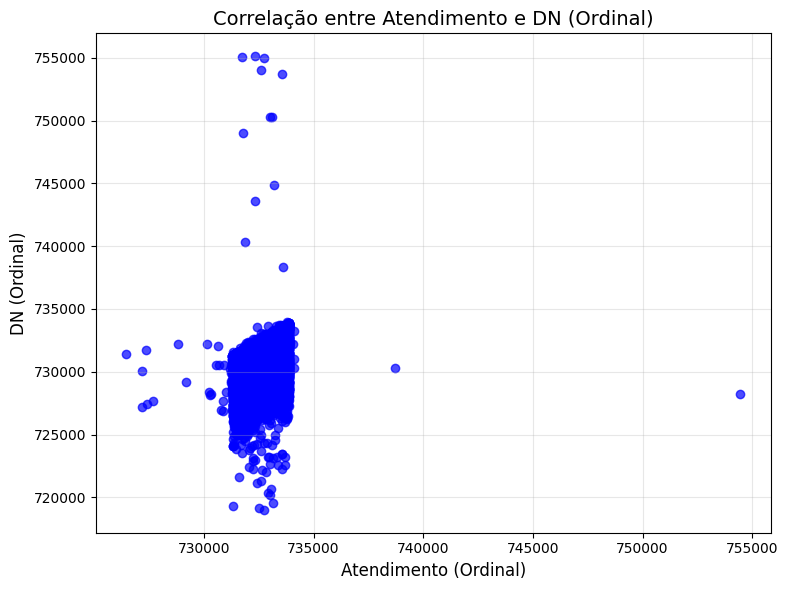

In [83]:
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))

# Gráfico de dispersão entre Atendimento_Ordinal e DN_Ordinal
plt.scatter(Base_Principal_Copia['Atendimento_Ordinal'], Base_Principal_Copia['DN'].map(lambda x: x.toordinal()), color='blue', alpha=0.7)

# Adicionando títulos e rótulos
plt.title("Correlação entre Atendimento e DN (Ordinal)", fontsize=14)
plt.xlabel("Atendimento (Ordinal)", fontsize=12)
plt.ylabel("DN (Ordinal)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

###A partir do uso da correlação, foi observado que as duas colunas (`['Atendimento']` e `['DN']`) não possuem uma correlação satisfatória, somente algumas correlações positivas fracas. Desse modo, foi decidido que as duas colunas serão **EXCLUÍDAS** da base de dados.

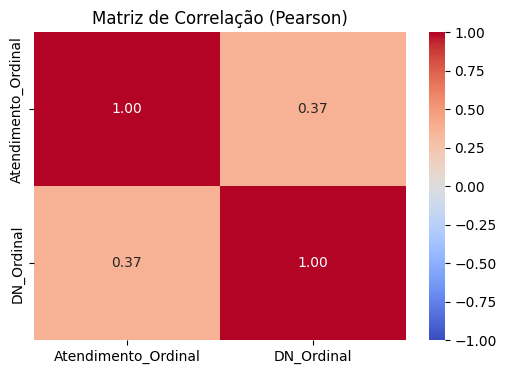

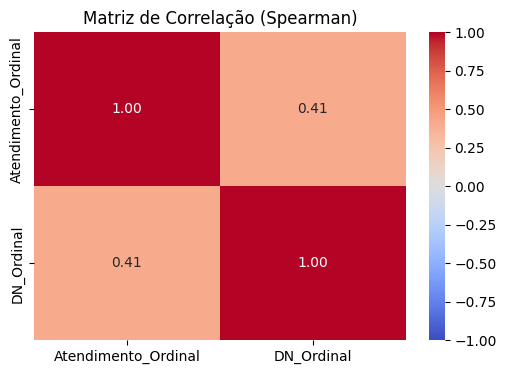

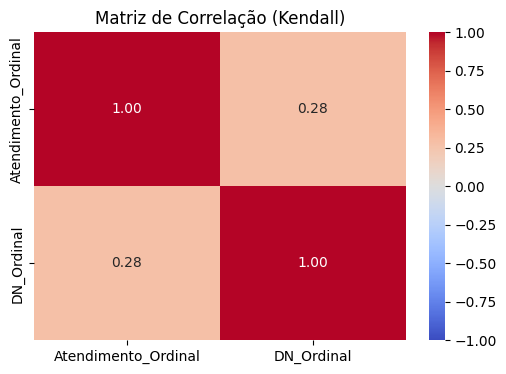

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Função para plotar o heatmap
def plot_heatmap(corr_matrix, method):
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f',
                xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
    plt.title(f'Matriz de Correlação ({method})')
    plt.show()

# Plotando os heatmaps
plot_heatmap(matriz_pearson, "Pearson")
plot_heatmap(matriz_spearman, "Spearman")
plot_heatmap(matriz_kendall, "Kendall")

###**Exclusão** das colunas `['Atendimento']` e `['DN']`.

In [85]:
#Pré-processamento
Base_Principal.drop(columns=["Atendimento", "DN"], inplace=True)

In [86]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna `['IDADE']`

###Para esta coluna, os valores **NaN** foram alterados para o valor da mediana da mesma coluna.

In [87]:
#Pré-processamento
Base_Principal["IDADE"].fillna(Base_Principal["IDADE"].median(), inplace=True)

<ipython-input-87-84b163331e08>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal["IDADE"].fillna(Base_Principal["IDADE"].median(), inplace=True)


In [88]:
#Pré-processamento e Análise Exploratória
Valores_NaN_IDADE = Base_Principal["IDADE"].isna().sum()
print(Valores_NaN_IDADE)

0


###Valores **negativos** também foram detectados.

In [89]:
#Análise Exploratória e Pré-processamento
Valores_Negativos_IDADE = Base_Principal[Base_Principal["IDADE"] < 0]
Quantidade_Negativos_IDADE = len(Valores_Negativos_IDADE)
print(Quantidade_Negativos_IDADE)

122


In [90]:
#Análise Exploratória e Pré-processamento
IDADE_Negativo = Base_Principal[Base_Principal["IDADE"] < 0]
print(IDADE_Negativo.head(10))

        Id  Peso  Altura   IMC   IDADE Convenio   PULSOS  PA SISTOLICA  \
2        3   0.0       0   0.0   -4.05     SULA  Normais           NaN   
589    590   0.0       0   0.0 -106.66    FUSEX  Normais           NaN   
760    761  11.2      76  19.0   -0.18      NaN  Normais           NaN   
942    943  22.4     119  16.0   -0.03   Funcef  Normais          80.0   
1213  1214   5.5       0   inf -112.09      NaN  Normais         100.0   
1576  1577  22.0     116  16.0 -105.04     CASS  Normais         100.0   
1707  1708  47.0     155  20.0 -100.83      NaN  Normais         120.0   
2050  2051   9.3      74  17.0   -9.94      NaN  Normais           NaN   
2425  2426  32.0     140  16.0   -3.15       GS  Normais           NaN   
2646  2647  14.8      94  17.0 -109.31  REAL S.  Normais           NaN   

      PA DIASTOLICA            PPA             B2      SOPRO   FC  \
2               NaN  Não Calculado         Normal  Sistólico   88   
589             NaN  Não Calculado         Norm

###Tais valores **negativos encontrados**, foram substituindo pela **mediana calculada, sem contar esses registros negativos**.

In [91]:
#Pré-processamento e Análise Exploratória
Mediana_IDADE = Base_Principal[Base_Principal["IDADE"] >= 0]["IDADE"].median()

In [92]:
#Pré-processamento e Análise Exploratória
Base_Principal["IDADE"] = Base_Principal["IDADE"].apply(lambda x: Mediana_IDADE if x < 0 else x)

In [93]:
#Análise Exploratória e Pré-processamento
print(Base_Principal["IDADE"].head())

0    0.12
1    0.02
2    5.64
3    0.50
4    9.60
Name: IDADE, dtype: float64


In [94]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna ~`['Convenio']`~

###Para essa coluna, uma análise mais "intuitiva" foi feita, destacando que informações sobre **convênio** dos pacientes não serão contribuintes para uma um bom desempenho dos futuros modelos aplicados. Por isso, foi decidido que a coluna será **excluída**.

In [95]:
#Pré-processamento
Base_Principal.drop(columns=["Convenio"], inplace=True)

##Coluna `['PULSOS']`

###Nesta coluna, a primeira operação foi transformar todas as categorias existentes em "*Lower Case*" para facilitar o **mapeamento** que seguirá.

In [96]:
#Pré-processamento
Base_Principal['PULSOS'] = Base_Principal['PULSOS'].str.strip().str.lower()

# Substituir valores inconsistentes
Base_Principal['PULSOS'] = Base_Principal['PULSOS'].replace({
    'normais': 'normais',
    'normais ': 'normais',
    'amplos': 'amplos',
    'femorais diminuidos': 'femorais diminuídos',
    'diminuídos': 'femorais diminuídos',
    'outro': 'outro'
})

###Essas foram as **categorias reconhecidas** da coluna:

*   `'normais'`;
*   `'amplos'`;
*   `'femorais diminuídos'`;
*   `'outro'`.

###E foram convertidas em **informações numéricas**, respectivamente:

*   `'0'`;
*   `'1'`;
*   `'2'`;
*   `'3'`.




In [97]:
#Análise Exploratória
print(Base_Principal['PULSOS'].unique())

['normais' nan 'outro' 'amplos' 'femorais diminuídos']


In [98]:
#Pré-processamento
Mapeamento_PULSOS = {
    "normais": 0,
    "amplos": 1,
    "femorais diminuídos": 2,
    "outro": 3
}

In [99]:
#Pré-processamento
Base_Principal["PULSOS"] = Base_Principal["PULSOS"].map(Mapeamento_PULSOS)

###Ainda faltou tratar os valores **NaN** desta coluna. Sendo assim, tais valores foram substituidas pelo valor calculado da **Moda** da coluna, que neste caso foi a categoria **0**.  

In [100]:
#Análise Exploratória
print(Base_Principal["PULSOS"].unique())

[ 0. nan  3.  1.  2.]


In [101]:
#Pré-processamento
Moda_PULSOS = Base_Principal["PULSOS"].mode()[0]
print(Moda_PULSOS)

0.0


In [102]:
#Pré-processamento
Base_Principal["PULSOS"] = Base_Principal["PULSOS"].fillna(Moda_PULSOS)

In [103]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Colunas `['PA SISTOLICA']` e `['PA DIASTOLICA'`]

###Foi calculado a mediana dessas 2 colunas, para substituir **NaN** por esses valores.

---

Obs.: Lembrando que na "*Análise Exploratória*", não foi detectado nenhum valor **negativo**.



In [104]:
#Pré-processamento
Mediana_PA_SISTOLICA = Base_Principal['PA SISTOLICA'].median()
Mediana_PA_DIASTOLICA = Base_Principal['PA DIASTOLICA'].median()

In [105]:
#Pré-processamento
Base_Principal['PA SISTOLICA'].fillna(Mediana_PA_SISTOLICA, inplace=True)
Base_Principal['PA DIASTOLICA'].fillna(Mediana_PA_DIASTOLICA, inplace=True)

<ipython-input-105-e673f628bf99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal['PA SISTOLICA'].fillna(Mediana_PA_SISTOLICA, inplace=True)
<ipython-input-105-e673f628bf99>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [106]:
#Análise Exploratória
Base_Principal.head(50)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física
5,6,26.0,112,21.0,4.40,0.0,100.0,60.0,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN
6,7,40.0,151,18.0,12.89,0.0,100.0,60.0,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN
7,8,28.0,117,20.0,5.89,0.0,110.0,65.0,Pre-Hipertensão PAS,Normal,ausente,80,Assintomático,NaN,F,5 - Parecer cardiológico,5 - Cirurgia
8,9,8.0,61,21.0,0.26,0.0,100.0,60.0,Não Calculado,Normal,ausente,120,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
9,10,5.1,57,16.0,0.22,0.0,100.0,60.0,Não Calculado,Normal,sistólico,110,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro


##Coluna `['PPA']`

###Nesta coluna, foi descoberto um novo tipo de **dado** "quebrado", o `'#VALUE!'`. Com isso, foi adotada a decisão de substituir esses dados por **NaN**. Sendo assim, antes dessa detecção, somente **217 registros** foram reconhecidos como NaN, e depois, esse número aumentou para **1.713 registros**.

In [107]:
import numpy as np

In [108]:
#Pré-processamento
#Substituir "#VALUE!" por NaN
Base_Principal["PPA"] = Base_Principal["PPA"].replace("#VALUE!", np.nan)

In [109]:
#Pré-processamento e Análise Exploratória
Valores_NaN_PPA = Base_Principal["PPA"].isna().sum()
print(Valores_NaN_PPA)

1713


###As categorias reconhecidas nessa coluna foram:

*   `'Nâo calculado'`;
*   `'Normal'`;
*   `'Pre-Hipertensão PAS'`;
*   `'HAS-2 PAS'`;
*   `'Pre-Hipertensão PAD'`;
*   `'HAS-1 PAS'`;
*   `'HAS-2 PAD'`;
*   `'HAS-1 PAD'`.

###Substituído por, respectivamente:

*   `'0'`;
*   `'1'`;
*   `'2'`;
*   `'3'`;
*   `'4'`;
*   `'5'`;
*   `'6'`;
*   `'7'`.











In [110]:
#Pré-processamento
Mapeamento_PPA = {
    "Não Calculado": 0,
    "Normal": 1,
    "Pre-Hipertensão PAS": 2,
    "HAS-2 PAS": 3,
    "Pre-Hipertensão PAD": 4,
    "HAS-1 PAS": 5,
    "HAS-2 PAD": 6,
    "HAS-1 PAD": 7
}

In [111]:
#Pré-processamento
Base_Principal["PPA"] = Base_Principal["PPA"].map(Mapeamento_PPA)

###Por fim, para esta coluna, os valores **NaN** foram alterados pelo cálculo da **Moda** da coluna.

In [112]:
#Pré-processamento
print(Base_Principal["PPA"].unique())

[ 0.  1.  2.  3.  4. nan  5.  6.  7.]


In [113]:
#Pré-processamento
Moda_PPA = Base_Principal["PPA"].mode()[0]
print(Moda_PPA)

0.0


In [114]:
#Pré-processamento
Base_Principal["PPA"].fillna(Moda_PPA, inplace=True)

<ipython-input-114-fc2a6eb8e5eb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal["PPA"].fillna(Moda_PPA, inplace=True)


In [115]:
#Análise Exploratória
Valores_NaN_PPA = Base_Principal["PPA"].isna().sum()
print(Valores_NaN_PPA)

0


In [116]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna `['B2']`

###Basicamente o mesmo **processamento** feito na coluna anterior. **Categorias** reconhecidas:

*   `'Normal'`;
*   `'Desdob fixo'`;
*   `'Outro'`;
*   `'Hiperfonética'`;
*   `'Única'`.

###Alteradas para as respectivas representações numéricas:

*   `'0'`;
*   `'1'`;
*   `'2'`;
*   `'3'`;
*   `'4'`.




In [117]:
#Pré-processamento
Mapeamento_B2 = {
  "Normal": 0,
  "Desdob fixo": 1,
  "Outro": 2,
  "Hiperfonética": 3,
  "Única": 4
}

In [118]:
#Pré-processamento
Base_Principal["B2"] = Base_Principal["B2"].map(Mapeamento_B2)

###Valores NaN foram substituídos também, assim como no processamento anterior, pelo cálculo da **Moda** da coluna.

In [119]:
#Pré-processamento e Análise Exploratória
print(Base_Principal["B2"].unique())

[ 0.  1.  2.  3. nan  4.]


In [120]:
#Pré-processamento e Análise Exploratória
Moda_B2 = Base_Principal["B2"].mode()[0]
print(Moda_B2)

0.0


In [121]:
#Pré-processamento
Base_Principal["B2"].fillna(Moda_B2, inplace=True)

<ipython-input-121-2b201ccdc563>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal["B2"].fillna(Moda_B2, inplace=True)


In [122]:
#Pré-processamento e Análise Exploratória
print(Base_Principal["B2"].isna().sum())

0


In [123]:
#Pré-processamento e Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna `['SOPRO']`

###O mapeamento das categorias feito aqui nesta coluna foi um pouco diferente, ao invés de processar todos os dados para "*Lower Case*", as categorias foram numeradas manualmente com todas suas **variações**.

In [124]:
#Pré-processamento
Mapeamento_SOPRO = {
    "ausente": 0,
    "Sistólico": 1,
    "sistólico": 1,
    "Diastólico": 2,
    "Contínuo": 3,
    "contínuo": 3,
    "Sistolico e diastólico": 4
}

In [125]:
#Pré-processamento
Base_Principal["SOPRO"] = Base_Principal["SOPRO"].map(Mapeamento_SOPRO)

In [126]:
#Análise Exploratória
print(Base_Principal["SOPRO"].unique())

[ 1.  0. nan  3.  4.]


###Valores **NaN** foram alterados para a **Moda** da coluna.

In [127]:
#Pré-processamento
Moda_SOPRO = Base_Principal["SOPRO"].mode()[0]
print(Moda_SOPRO)

0.0


In [128]:
#Pré-processamento
Base_Principal["SOPRO"].fillna(Moda_SOPRO, inplace=True)

<ipython-input-128-2e3daad8cf10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal["SOPRO"].fillna(Moda_SOPRO, inplace=True)


In [129]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna `['FC']`

###Nesta coluna, através da "*Análise Exploratória*" foi constatado que a mesma possui um tipo que não é **numérico**, sendo assim, foi necessário a conversão para o tipo '`float`'.

In [130]:
#Pré-processamento
Base_Principal["FC"] = pd.to_numeric(Base_Principal["FC"], errors="coerce")

In [131]:
#Pré-processamento
print(Base_Principal['FC'].dtype)

float64


###Possíveis *outliers* para a coluna também foram tratados, através de seu contexto. Todos esses valores encontrados foram alterados para **NaN**, sendo que o número desses valores foi de **2.041** para **2.075** **registros**.

In [132]:
#Pré-processamento
# Substituir valores absurdos por NaN
Base_Principal.loc[(Base_Principal["FC"] < 40) | (Base_Principal["FC"] > 220), "FC"] = np.nan

In [133]:
#Pré-processamento
Valores_NaN_FC = Base_Principal["FC"].isna().sum()
print(Valores_NaN_FC)

2075


###Ao consultar os valores únicos desta coluna, também foi possível observar que existiam representações para faixas de valores, por exemplo: "**50-100**". Por isso, foi criada uma **função** para tratar esses valores através da substituição pela **média** dessa faixa de valor.

In [134]:
#Pré-processamento
# Função para calcular a média de faixas
def Tratar_Faixa(valor):
    if isinstance(valor, str) and "-" in valor:
        partes = valor.split("-")
        try:
            return (float(partes[0]) + float(partes[1])) / 2
        except ValueError:
            return np.nan
    return valor

# Aplicar função à coluna
Base_Principal["FC"] = Base_Principal["FC"].apply(Tratar_Faixa)

###E por fim, os valores **NaN** foram alterados para a **Mediana** da coluna.

In [135]:
#Pré-processamento
Mediana_FC = Base_Principal["FC"].median()

In [136]:
#Pré-processamento
Base_Principal["FC"].fillna(Mediana_FC, inplace=True)

<ipython-input-136-cc0192b1bdc4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal["FC"].fillna(Mediana_FC, inplace=True)


In [137]:
#Pré-processamento
print(Base_Principal["FC"].describe())

count    17873.000000
mean        92.050076
std         15.715048
min         43.000000
25%         80.000000
50%         90.000000
75%        100.000000
max        214.000000
Name: FC, dtype: float64


In [138]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112.0,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128.0,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88.0,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92.0,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90.0,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna `['HDA 1']`

###O mapeamento dessa coluna foi feito através do reconhecimento das categorias e substituídas pelos seus respectivos valores numéricos:

*   `'Palpitacao'`;
*   `'Dispneia'`;
*   `'Assintomático'`;
*   `'Dor precordial'`;
*   `'Desmaio/tontura'`;
*   `'Outro'`;
*   `'Cianose'`;
*   `'Ganho de peso'`.

###Valores numéricos:

*   `'0'`;
*   `'1'`;
*   `'2'`;
*   `'3'`;
*   `'4'`;
*   `'5'`;
*   `'6'`;
*   `'7'`.



In [139]:
#Pré-processamento
Mapeamento_HDA1 = {
  'Palpitacao': 0,
  'Dispneia': 1,
  'Assintomático': 2,
  'Dor precordial': 3,
  'Desmaio/tontura': 4,
  'Outro': 5,
  'Cianose': 6,
  'Ganho de peso': 7,
}

In [140]:
#Pré-processamento
Base_Principal["HDA 1"] = Base_Principal["HDA 1"].replace(Mapeamento_HDA1)

<ipython-input-140-e0801780f69c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Base_Principal["HDA 1"] = Base_Principal["HDA 1"].replace(Mapeamento_HDA1)


In [141]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112.0,0.0,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128.0,1.0,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88.0,2.0,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92.0,2.0,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90.0,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


In [142]:
#Análise Exploratória
print(Base_Principal['HDA 1'].dtype)

float64


###Para tratar os valores **NaN**, foi calculado a **Moda** da coluna e substituindo.

In [143]:
#Pré-processamento
Moda_HD1 = Base_Principal["HDA 1"].mode()[0]

In [144]:
#Pré-processamento
Base_Principal["HDA 1"] = Base_Principal["HDA 1"].replace(np.nan, Moda_HD1)

In [145]:
#Pré-processamento
Valores_NaN_HDA1 = Base_Principal["HDA 1"].isna().sum()
print(Valores_NaN_HDA1)

0


In [146]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112.0,0.0,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128.0,1.0,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88.0,2.0,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92.0,2.0,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90.0,2.0,NaN,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna `['HDA2']`

###Quando foi consultado a quantidade de valores NaN desta coluna, essa análise retornou **17.221 registros**. Sendo assim, foi decidido que o melhor caminho a se seguir era de **EXCLUIR** tal coluna.

In [147]:
#Pré-processamento
Base_Principal.drop(columns=['HDA2'], inplace=True)

In [148]:
#Pré-processamento
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112.0,0.0,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128.0,1.0,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88.0,2.0,M,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92.0,2.0,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90.0,2.0,M,5 - Parecer cardiológico,5 - Atividade física


##Coluna `['SEXO']`

###Assim como em colunas anteriores, para esta coluna o mapeamento foi feito reconhecendo as categorias e substituindo pelos seus respectivos números:

*   `'M'`, `'Masculino'` e `'masculino'`: `'1'`;
*   `'F'`, `'Feminino'`: `'0'`;
*   `'Indeterminado'`: `'2'`.



In [149]:
#Pré-processamento
Base_Principal['SEXO'] = Base_Principal['SEXO'].replace({
    'M': 1,
    'Masculino': 1,
    'masculino': 1,
    'F': 0,
    'Feminino': 0,
    'Indeterminado': 2
})

<ipython-input-149-07bbe954ae8f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Base_Principal['SEXO'] = Base_Principal['SEXO'].replace({


In [150]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112.0,0.0,1.0,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128.0,1.0,1.0,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88.0,2.0,1.0,2 - Check-up,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92.0,2.0,1.0,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90.0,2.0,1.0,5 - Parecer cardiológico,5 - Atividade física


###Já os valores **NaN**, passaram a ser o cálculo da **Moda** da coluna.

In [151]:
#Análise Exploratória
print(Base_Principal["SEXO"].unique())

[ 1.  0.  2. nan]


In [152]:
#Pré-processamento
Base_Principal['SEXO'].fillna(Base_Principal['SEXO'].mode()[0], inplace=True)

<ipython-input-152-8c4cee3795b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal['SEXO'].fillna(Base_Principal['SEXO'].mode()[0], inplace=True)


In [153]:
#Pré-processamento
print(Base_Principal["SEXO"].unique())

[1. 0. 2.]


##Coluna `['MOTIVO1']`

###Esta coluna possui algumas informações adicionais para o mapeamento das categorias. Isso porque cada categoria já possui um rótulo estabelecido, um valor numérico. Sendo assim, o mapeamento seguiu essa lógica. Portanto:

*   `'6 - Suspeita de cardiopatia'`: `'6'`;
*   `'2 - Check-up'`: `'2'`;
*   `'5 - Parecer cardiológico'`: `'5'`;
*   `'1 - Cardiopatia já estabelecida'`: `'1'`;
*   `'7 - Outro'`: `'7'`.



In [154]:
#Pré-processamento
Mapeamento_MOTIVO1 = {
    '6 - Suspeita de cardiopatia': 6,
    '2 - Check-up': 2,
    '5 - Parecer cardiológico': 5,
    '1 - Cardiopatia já estabelecida': 1,
    '7 - Outro': 7
}

In [155]:
#Pré-processamento
Base_Principal['MOTIVO1'] = Base_Principal['MOTIVO1'].map(Mapeamento_MOTIVO1)

###Valores **NaN** foram substituídos pela **Moda** da coluna.

In [156]:
#Pré-processamento
print(Base_Principal["MOTIVO1"].unique())

[ 6.  2.  5.  1. nan  7.]


In [157]:
#Pré-processamento
Moda_MOTIVO1 = Base_Principal['MOTIVO1'].mode()[0]
print(Moda_MOTIVO1)

5.0


In [158]:
#Pré-processamento
Base_Principal['MOTIVO1'].fillna(Moda_MOTIVO1, inplace=True)

<ipython-input-158-8a4936c088e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal['MOTIVO1'].fillna(Moda_MOTIVO1, inplace=True)


In [159]:
#Pré-processamento
print(Base_Principal["MOTIVO1"].unique())

[6. 2. 5. 1. 7.]


In [160]:
#Análise Exploratória
print(Base_Principal['MOTIVO1'].dtype)

float64


In [161]:
#Análise Exploratória
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112.0,0.0,1.0,6.0,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128.0,1.0,1.0,6.0,6 - Dispnéia
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88.0,2.0,1.0,2.0,NaN
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92.0,2.0,1.0,5.0,NaN
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90.0,2.0,1.0,5.0,5 - Atividade física


##Coluna `['MOTIVO2']`

###Aqui, a mesma estratégia adotada na coluna anterior, foi mantida. Cada **categoria** já possui um **rótulo** estabelecido. Supondo que seja do mesmo **grupo de síntomas**, o **mapeamento** seguiu com os rótulos já  informados:

In [162]:
#Pré-processamento
Mapeamento_MOTIVO2 = {
    '6 - Palpitação/taquicardia/arritmia': 6,
    '6 - Dispnéia': 6,
    '5 - Atividade física': 5,
    '5 - Cirurgia': 5,
    '6 - Sopro': 6,
    '1 - Cardiopatia adquirida': 1,
    '1 - Cardiopatia congenica': 1,
    '6 - Dor precordial': 6,
    '6 - HAS/dislipidemia/obesidade': 6,
    '6 - Cianose': 6,
    'Outro': 7,
    '6 - Alterações de pulso/perfusão': 6,
    '6 - Cardiopatia na familia': 6,
    '6 - Cansaço': 6,
    '5 - Uso de cisaprida': 5,
    '6 - Cianose e dispnéia': 6
}

In [163]:
#Pré-processamento
Base_Principal['MOTIVO2'] = Base_Principal['MOTIVO2'].map(Mapeamento_MOTIVO2)

###E os valores **NaN** foram alterados para a **Moda** da coluna.

In [164]:
#Pré-processamento
print(Base_Principal["MOTIVO2"].unique())

[ 6. nan  5.  1.  7.]


In [165]:
#Pré-processamento
Moda_MOTIVO2 = Base_Principal['MOTIVO2'].mode()[0]
print(Moda_MOTIVO2)

5.0


In [166]:
#Pré-processamento
Base_Principal['MOTIVO2'].fillna(Moda_MOTIVO2, inplace=True)

<ipython-input-166-eeb3009e15e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Principal['MOTIVO2'].fillna(Moda_MOTIVO2, inplace=True)


In [167]:
#Pré-processamento
print(Base_Principal["MOTIVO2"].unique())

[6. 5. 1. 7.]


In [168]:
#Pré-processamento
Base_Principal.head()

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,0.12,0.0,100.0,60.0,0.0,0.0,1.0,112.0,0.0,1.0,6.0,6.0
1,2,3.5,50,14.0,0.02,0.0,100.0,60.0,0.0,0.0,0.0,128.0,1.0,1.0,6.0,6.0
2,3,0.0,0,0.0,5.64,0.0,100.0,60.0,0.0,0.0,1.0,88.0,2.0,1.0,2.0,5.0
3,4,8.1,65,19.0,0.50,0.0,100.0,60.0,0.0,0.0,0.0,92.0,2.0,1.0,5.0,5.0
4,5,39.5,142,20.0,9.60,0.0,85.0,50.0,1.0,0.0,0.0,90.0,2.0,1.0,5.0,5.0


##Obs.: **arredondamento** da coluna `['IMC']` para **2 casas decimais**.

In [169]:
#Pré-processamento
Base_Principal['IMC'] = Base_Principal['IMC'].round(2)

##Base "`Base_Treino`"

###Depois de realizar a "*Análise Exploratória*" e o "*Pré-processamento*" na base principal ('`Base_Principal`'), o mesmo foi feito com a **base de treino**, na coluna `['CLASSE']`. E alguns pontos foram descobertos para tratamento.

In [170]:
#Análise Exploratória
Base_Treino.head()

,Id,CLASSE
0,10524,Normal
1,17249,Anormal
2,4483,Anormal
3,6830,Normal
4,11652,Normal


###Foi detectado algumas **categorias duplicadas**, assim como as que já lidamos na '`Base_Principal`'.

In [171]:
#Análise Exploratória
print(Base_Treino["CLASSE"].unique())

['Normal' 'Anormal' nan 'Normais']


###Valores **NaN** também foram detectados.

In [172]:
#Análise Exploratória
Valores_NaN_CLASSE = Base_Treino["CLASSE"].isna().sum()
print(Valores_NaN_CLASSE)

1168


###As classes foram ajustadas para tratar o problema descrito anteriormente relacionado às **classes**.

In [173]:
#Pré-processamento
Base_Treino['CLASSE'] = Base_Treino['CLASSE'].replace({'Normais': 'Normal'})

In [174]:
#Pré-processamento
print(Base_Treino["CLASSE"].unique())

['Normal' 'Anormal' nan]


###Contudo, os valores **NaN** dessa coluna, foram alterados para o valor de sua **Moda**.

In [175]:
#Pré-processamento
CLASSE_Mais_Frequente = Base_Treino['CLASSE'].mode()[0]
print(CLASSE_Mais_Frequente)

Normal


In [176]:
#Pré-processamento
Base_Treino['CLASSE'] = Base_Treino['CLASSE'].fillna(CLASSE_Mais_Frequente)

In [177]:
#Análise Exploratória
Base_Teste.head()

,Id
0,8957
1,4246
2,9089
3,10606
4,9863


#Experimentos e Análise dos Resultados

###Para a aplicação das técnicas de Aprendizado de Máquina, foram propostos os seguintes algoritmos:

*   *k*-vizinhos mais próximos;
*   Naive Bayes;
*   Regressão Logística;
*   Redes Neurais Artificiais;
*   Máquina de Vetores de Suporte.



###Para as métricas de desempenho, foram utilizadas as seguintes:

*   Área Sob a Curva ROC (AUC - *area under the ROC curve*);
*   Acurácia;
*   Precisão;
*   Recall;
*   F1-Score.

###Com foco na **AUC**.



###Aplicação do ***k*-vizinhos mais próximos**


Treinando modelo KNN com n_neighbors = 5
AUC-ROC média na validação cruzada: 0.9360
Submissão salva como: submissao_kaggle_n5.csv
AUC-ROC no conjunto de treino: 0.9846

Matriz de Confusão (Treino):
[[9061  245]
 [ 676 4745]]

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9306
           1       0.95      0.88      0.91      5421

    accuracy                           0.94     14727
   macro avg       0.94      0.92      0.93     14727
weighted avg       0.94      0.94      0.94     14727


Treinando modelo KNN com n_neighbors = 9
AUC-ROC média na validação cruzada: 0.9403
Submissão salva como: submissao_kaggle_n9.csv
AUC-ROC no conjunto de treino: 0.9778

Matriz de Confusão (Treino):
[[9065  241]
 [ 700 4721]]

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9306
           1       0.95      0.87   

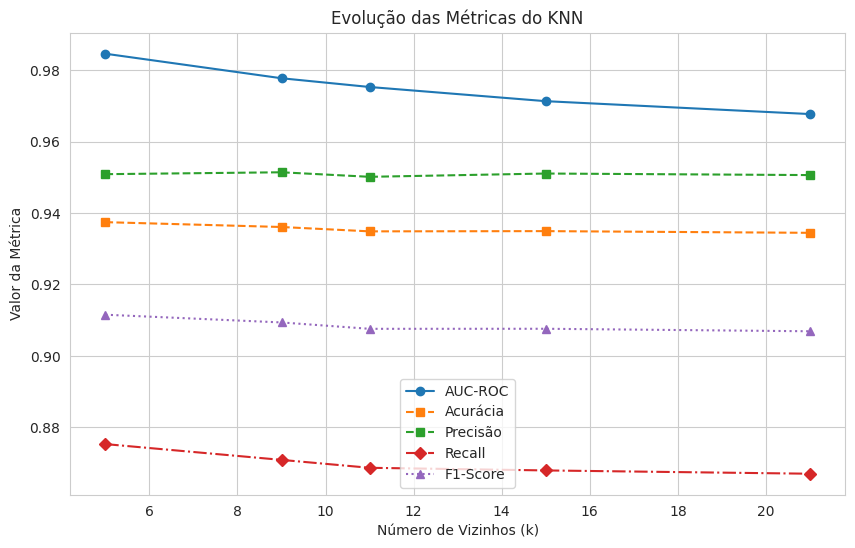

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

#Merge do treino
Treino_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Treino["Id"])]
Treino_Completo = Treino_Completo.merge(Base_Treino, on='Id', how='left')

#Separar variáveis independentes e dependentes
X = Treino_Completo.drop(columns=["Id", "CLASSE"])
y = Treino_Completo["CLASSE"].map({'Normal': 0, 'Anormal': 1})  # Binário

#Substituir valores infinitos e NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max().max(), inplace=True)

#Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Definição de diferentes valores de n_neighbors
neighbors_list = [5, 9, 11, 15, 21]

# Listas para armazenar métricas
auc_scores_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
neighbors_used = []

for n in neighbors_list:
    print(f"\nTreinando modelo KNN com n_neighbors = {n}")

    #Inicializar o classificador KNN
    knn = KNeighborsClassifier(n_neighbors=n)

    #Validação cruzada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='roc_auc')

    print(f"AUC-ROC média na validação cruzada: {np.mean(auc_scores):.4f}")

    #Treinar o modelo no conjunto completo de treino
    knn.fit(X_scaled, y)

    #Preparar os dados de teste
    Teste_Completo = Base_Principal[Base_Principal['Id'].isin(Base_Teste['Id'])]
    X_teste = Teste_Completo.drop(columns=['Id'])

    #Substituir valores infinitos e NaN nos dados de teste
    X_teste.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_teste.fillna(X_teste.max().max(), inplace=True)

    #Normalizar os dados de teste
    X_teste_scaled = scaler.transform(X_teste)

    #Prever probabilidades no conjunto de teste
    y_teste_prob = knn.predict_proba(X_teste_scaled)[:, 1]

    #Criar um DataFrame para a submissão
    submissao = Teste_Completo[['Id']].copy()
    submissao['Predicted'] = y_teste_prob
    submissao.to_csv(f'submissao_kaggle_n{n}.csv', index=False)

    print(f"Submissão salva como: submissao_kaggle_n{n}.csv")

    # Calcular a AUC no conjunto de treino
    y_treino_prob = knn.predict_proba(X_scaled)[:, 1]
    auc_treino = roc_auc_score(y, y_treino_prob)
    print(f"AUC-ROC no conjunto de treino: {auc_treino:.4f}")

    #Calcular a matriz de confusão no treino
    y_treino_pred = knn.predict(X_scaled)
    #Acurácia
    acc_treino = accuracy_score(y, y_treino_pred)
    conf_matrix = confusion_matrix(y, y_treino_pred)
    print("\nMatriz de Confusão (Treino):")
    print(conf_matrix)

    class_report = classification_report(y, y_treino_pred, output_dict=True)
    #Exibir relatório de classificação
    print("\nRelatório de Classificação (Treino):")
    print(classification_report(y, y_treino_pred))

    #Armazenar métricas para os gráficos
    auc_scores_list.append(auc_treino)
    accuracy_list.append(acc_treino)
    precision_list.append(class_report["1"]["precision"])
    recall_list.append(class_report["1"]["recall"])
    f1_list.append(class_report["1"]["f1-score"])
    neighbors_used.append(n)

#Criar gráfico de evolução das métricas
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(neighbors_used, auc_scores_list, marker='o', label="AUC-ROC", linestyle='-')
plt.plot(neighbors_used, accuracy_list, marker='s', label="Acurácia", linestyle='--')
plt.plot(neighbors_used, precision_list, marker='s', label="Precisão", linestyle='--')
plt.plot(neighbors_used, recall_list, marker='D', label="Recall", linestyle='-.')
plt.plot(neighbors_used, f1_list, marker='^', label="F1-Score", linestyle=':')

plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Valor da Métrica")
plt.title("Evolução das Métricas do KNN")
plt.legend()
plt.show()

####Para a aplicação do algoritmo K-NN, foram feitos testes com diferentes números de *k*-vizinhos:

*   `k = 5`;
*   `k = 9`;
*   `k = 11`;
*   `k = 15`;
*   `k = 21`.

####O melhor **desempenho** alcançado foi com `k = 21`, especificamente:

*   **AUC-ROC** de 0.9453 na validação cruzada;
*   **Acurácia** de 93%;
*   Um bom equilíbrio entre as **métricas**.

####Comportamento das métricas:

*   **AUC-ROC** de treino diminuiu com o aumento de `k` (de 0.9846 para 0.9677);
*   **AUC-ROC** de validação aumentou com o aumento de `k` (de 0.9360 para 0.9453);
*   Por fim, as outras métricas mantiveram-se estáveis.







###Aplicação do **Naive Bayes**

AUC-ROC média na validação cruzada: 0.9365
Acurácia média: 0.9211
Precisão média: 0.9033
Recall médio: 0.8799
F1-Score médio: 0.8914

Matriz de Confusão (Validação Cruzada):
[[8795  511]
 [ 651 4770]]

Relatório de Classificação (Validação Cruzada):
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9306
           1       0.90      0.88      0.89      5421

    accuracy                           0.92     14727
   macro avg       0.92      0.91      0.91     14727
weighted avg       0.92      0.92      0.92     14727

Submissão salva como 'submissao_naive_bayes.csv'


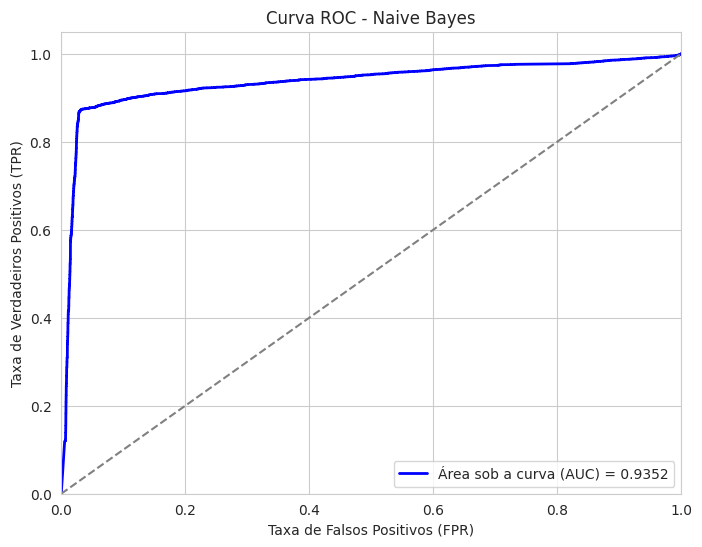

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, confusion_matrix, classification_report, roc_curve

#Merge do treino
Treino_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Treino["Id"])]
Treino_Completo = Treino_Completo.merge(Base_Treino, on="Id", how="left")

#Separar variáveis independentes e dependentes
X = Treino_Completo.drop(columns=["Id", "CLASSE"])
y = Treino_Completo["CLASSE"]

#Mapear as classes para valores binários
y = y.map({"Normal": 0, "Anormal": 1})

#Substituir valores infinitos e NaN nos dados de treino
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max().max(), inplace=True)

#Normalizar os dados com RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#Configuração do modelo Naive Bayes
naive_bayes = GaussianNB()

#Validação cruzada com StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

for train_idx, val_idx in cv.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    #Treinar o modelo diretamente sem sobreamostragem
    naive_bayes.fit(X_train, y_train)

    #Previsão das probabilidades e classes no conjunto de validação
    y_val_prob = naive_bayes.predict_proba(X_val)[:, 1]
    y_val_pred = naive_bayes.predict(X_val)

    #Calcular métricas
    auc_scores.append(roc_auc_score(y_val, y_val_prob))
    accuracy_scores.append(accuracy_score(y_val, y_val_pred))
    precision_scores.append(precision_score(y_val, y_val_pred))
    recall_scores.append(recall_score(y_val, y_val_pred))
    f1_scores.append(f1_score(y_val, y_val_pred))
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

#Exibir métricas médias
print(f"AUC-ROC média na validação cruzada: {np.mean(auc_scores):.4f}")
print(f"Acurácia média: {np.mean(accuracy_scores):.4f}")
print(f"Precisão média: {np.mean(precision_scores):.4f}")
print(f"Recall médio: {np.mean(recall_scores):.4f}")
print(f"F1-Score médio: {np.mean(f1_scores):.4f}")

#Exibir matriz de confusão agregada
matriz_confusao_final = np.sum(conf_matrices, axis=0)
print("\nMatriz de Confusão (Validação Cruzada):")
print(matriz_confusao_final)

#Exibir relatório de classificação
print("\nRelatório de Classificação (Validação Cruzada):")
print(classification_report(y, naive_bayes.predict(X_scaled)))

#Preparar os dados de teste
Teste_Completo = Base_Principal[Base_Principal['Id'].isin(Base_Teste['Id'])]
X_teste = Teste_Completo.drop(columns=['Id'])

#Substituir valores infinitos e NaN no conjunto de teste
X_teste.replace([np.inf, -np.inf], np.nan, inplace=True)
X_teste.fillna(X_teste.max().max(), inplace=True)

#Normalizar os dados de teste
X_teste_scaled = scaler.transform(X_teste)

#Prever as probabilidades para o conjunto de teste
y_teste_prob = naive_bayes.predict_proba(X_teste_scaled)[:, 1]

#Criar o arquivo de submissão
submissao = Teste_Completo[["Id"]].copy()
submissao["Predicted"] = y_teste_prob
submissao.to_csv("submissao_naive_bayes.csv", index=False)

print("Submissão salva como 'submissao_naive_bayes.csv'")

#Calcular curva ROC
fpr, tpr, _ = roc_curve(y, naive_bayes.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

#Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Área sob a curva (AUC) = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

####O algoritmo **Naive Bayes** apresentou um desempenho robusto com as métricas utilizadas. A **AUC-ROC** apresentou um resultado de 0.9352. A curva exibida no gráfico indica uma excelente capacidade de discriminação, com uma curva bem acima da linha diagonal de referência.

####Comprado ao **KNN** apresentado anteriormente, o **Naive Bayes** mostrou um desempenho **ligeiramente  inferior**, mas ainda manteve métricas muito boas.

###Aplicação do **Regressão Logística**

AUC-ROC média: 0.9460
Acurácia média: 0.9357
Precisão média: 0.9527
Recall médio: 0.8685
F1-Score médio: 0.9086
Submissão salva como 'submissao_logistica.csv'


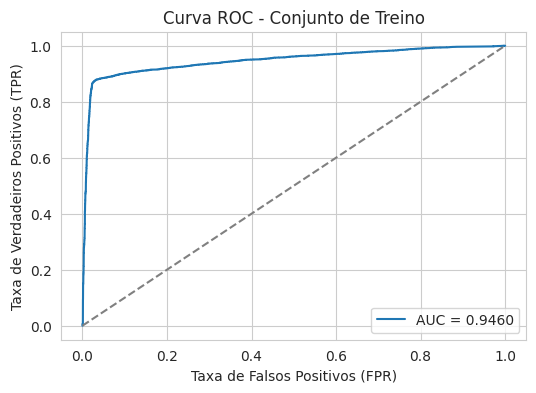

In [182]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

#Merge do treino
Treino_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Treino["Id"])]
Treino_Completo = Treino_Completo.merge(Base_Treino, on="Id", how="left")

#Separar variáveis independentes e dependentes
X = Treino_Completo.drop(columns=["Id", "CLASSE"])
y = Treino_Completo["CLASSE"].map({"Normal": 0, "Anormal": 1})  #Mapeamento binário

#Substituir valores infinitos e NaN nos dados de treino
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max().max(), inplace=True)

#Normalizar os dados com RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#Configuração do modelo de Regressão Logística
log_reg = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    C=1.0,
    max_iter=500,
    random_state=42
)

#Validação cruzada com StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores, acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], [], []

for train_idx, val_idx in cv.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    #Treinar o modelo diretamente com os dados originais
    log_reg.fit(X_train, y_train)

    #Previsão das probabilidades e classes para validação
    y_val_prob = log_reg.predict_proba(X_val)[:, 1]
    y_val_pred = log_reg.predict(X_val)

    #Cálculo das métricas
    auc_scores.append(roc_auc_score(y_val, y_val_prob))
    acc_scores.append(accuracy_score(y_val, y_val_pred))
    prec_scores.append(precision_score(y_val, y_val_pred))
    rec_scores.append(recall_score(y_val, y_val_pred))
    f1_scores.append(f1_score(y_val, y_val_pred))

#Exibir métricas médias
print(f"AUC-ROC média: {np.mean(auc_scores):.4f}")
print(f"Acurácia média: {np.mean(acc_scores):.4f}")
print(f"Precisão média: {np.mean(prec_scores):.4f}")
print(f"Recall médio: {np.mean(rec_scores):.4f}")
print(f"F1-Score médio: {np.mean(f1_scores):.4f}")

#Preparar os dados de teste
Teste_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Teste["Id"])]
X_teste = Teste_Completo.drop(columns=["Id"])

#Substituir valores infinitos e NaN no conjunto de teste
X_teste.replace([np.inf, -np.inf], np.nan, inplace=True)
X_teste.fillna(X_teste.max().max(), inplace=True)

#Verificar se ainda há valores inválidos
if np.isinf(X_teste.values).any() or np.isnan(X_teste.values).any():
    raise ValueError("O conjunto de teste ainda contém valores inválidos.")

#Normalizar os dados de teste
X_teste_scaled = scaler.transform(X_teste)

#Prever as probabilidades para o conjunto de teste
y_teste_prob = log_reg.predict_proba(X_teste_scaled)[:, 1]
y_teste_pred = log_reg.predict(X_teste_scaled)

#Criar o arquivo de submissão
submissao = Teste_Completo[["Id"]].copy()
submissao["Predicted"] = y_teste_prob
submissao.to_csv("submissao_logistica.csv", index=False)
print("Submissão salva como 'submissao_logistica.csv'")

#Curva ROC
fpr, tpr, _ = roc_curve(y, log_reg.predict_proba(X_scaled)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {np.mean(auc_scores):.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Conjunto de Treino")
plt.legend()
plt.show()


####Assim como o **Naive Bayes**, o algoritmo de **Regressão Logística** desempenhou muito bem, com base nos valores das métricas:

*   AUC-ROC: 0.9457;
*   Acurácia: 93.58%;
*   Precisão: 95%;
*   Recall: 84.16%;
*   F1-Score: 90.91%.

####A curva mostra uma excelente separação das classes. Ela está bem distante da linha **diagonal de referência**, confirmando o bom desempenho.

####Por fim, supera levemente o **KNN** e é superior ao **Naive Bayes**.


###Aplicação do **Redes Neurais Artificais**

In [183]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

#Merge do treino
Treino_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Treino["Id"])]
Treino_Completo = Treino_Completo.merge(Base_Treino, on="Id", how="left")

#Separar variáveis independentes e dependentes
X = Treino_Completo.drop(columns=["Id", "CLASSE"])
y = Treino_Completo["CLASSE"]

#Mapear as classes para valores binários
y = y.map({"Normal": 0, "Anormal": 1})

#Substituir valores infinitos e NaN nos dados de treino
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max().max(), inplace=True)

#Normalizar os dados com RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#Configuração da RNA com ajustes
rna = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),  #Estrutura da rede
    activation="tanh",                   #Função de ativação
    solver="adam",                       #Otimizador
    learning_rate_init=0.001,            #Taxa de aprendizado
    alpha=0.0005,                        #Regularização L2
    max_iter=500,                        #Iterações máximas
    batch_size=64,                       #Tamanho do batch
    early_stopping=True,                 #Interrompe o treino se não melhorar
    validation_fraction=0.1,             #Validação durante o treino
    random_state=42,                     #Reprodutibilidade
)

cv_RNA = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_idx, val_idx in cv_RNA.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    #Treinar o modelo
    rna.fit(X_train, y_train)

    #Previsão das probabilidades e classes para o conjunto de validação
    y_val_pred_prob = rna.predict_proba(X_val)[:, 1]
    y_val_pred = rna.predict(X_val)

    #Calcular métricas
    auc = roc_auc_score(y_val, y_val_pred_prob)
    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    auc_scores.append(auc)
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

print(f"AUC-ROC média na validação cruzada: {np.mean(auc_scores):.4f}")
print(f"Acurácia média na validação cruzada: {np.mean(accuracy_scores):.4f}")
print(f"Precisão média na validação cruzada: {np.mean(precision_scores):.4f}")
print(f"Recall médio na validação cruzada: {np.mean(recall_scores):.4f}")
print(f"F1-Score médio na validação cruzada: {np.mean(f1_scores):.4f}")

#Preparar os dados de teste
Teste_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Teste["Id"])]
X_teste = Teste_Completo.drop(columns=["Id"])

#Substituir valores infinitos e NaN nos dados de teste
X_teste.replace([np.inf, -np.inf], np.nan, inplace=True)
X_teste.fillna(X_teste.max().max(), inplace=True)

#Normalizar os dados de teste
X_teste_scaled = scaler.transform(X_teste)

#Prever as probabilidades para o conjunto de teste
y_teste_prob = rna.predict_proba(X_teste_scaled)[:, 1]

#Criar o arquivo de submissão
submissao = Teste_Completo[["Id"]].copy()
submissao["Predicted"] = y_teste_prob
submissao.to_csv("Kaggle - RNA Otimizada 6.csv", index=False)

print("Submissão salva como 'Kaggle - RNA Otimizada 7.csv'")

AUC-ROC média na validação cruzada: 0.9487
Acurácia média na validação cruzada: 0.9307
Precisão média na validação cruzada: 0.9350
Recall médio na validação cruzada: 0.8731
F1-Score médio na validação cruzada: 0.9085
Submissão salva como 'Kaggle - RNA Otimizada 7.csv'


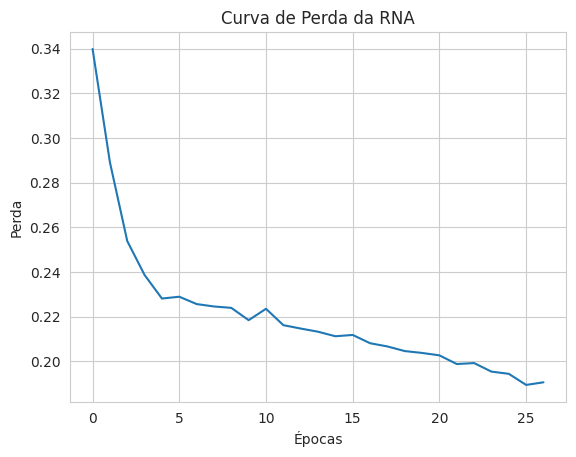

In [184]:
plt.plot(rna.loss_curve_)
plt.title("Curva de Perda da RNA")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.show()

####Até o momento, o algoritmo **RNA** apresentou a melhor **performance geral**. Apresentou uma **AUC-ROC** de 0.9483. A curva de perda mostra um convergência consistente ao longo das épocas, apresentando também uma redução significante da perda nas primeiras épocas. Acurácia: 92.76%, Precisão: 92.42%, Recall: 87.62% e F1-Score: 90.91%.

###Aplicação do **Máquina de Vetores de Suporte**

In [185]:
from sklearn.svm import SVC

#Merge do treino
Treino_Completo_SVM = Base_Principal[Base_Principal["Id"].isin(Base_Treino["Id"])]
Treino_Completo_SVM = Treino_Completo_SVM.merge(Base_Treino, on="Id", how="left")

#Separar variáveis independentes e dependentes
X_SVM = Treino_Completo_SVM.drop(columns=["Id", "CLASSE"])
y_SVM = Treino_Completo_SVM["CLASSE"]

#Mapear as classes para valores binários (0 para 'Normal' e 1 para 'Anormal')
y_SVM = y_SVM.map({"Normal": 0, "Anormal": 1})

#Substituir valores infinitos e NaN nos dados de treino
X_SVM.replace([np.inf, -np.inf], np.nan, inplace=True)
X_SVM.fillna(X_SVM.max().max(), inplace=True)

#Normalização dos dados usando RobustScaler
scaler = RobustScaler()
X_scaled_SVM = scaler.fit_transform(X_SVM)

#Configuração do modelo de SVM
svm = SVC(
    kernel="rbf",                   #Kernel radial base function (RBF)
    C=1.0,                          #Parâmetro de regularização
    probability=True,               #Necessário para obter probabilidades
    random_state=42
)

#Validação cruzada para avaliação do desempenho (usando AUC-ROC)
cv_SVM = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores_SVM = []
accuracy_scores_SVM = []
precision_scores_SVM = []
recall_scores_SVM = []
f1_scores_SVM = []

for train_idx_SVM, val_idx_SVM in cv_SVM.split(X_scaled_SVM, y_SVM):
    X_train_SVM, X_val_SVM = X_scaled_SVM[train_idx_SVM], X_scaled_SVM[val_idx_SVM]
    y_train_SVM, y_val_SVM = y_SVM.iloc[train_idx_SVM], y_SVM.iloc[val_idx_SVM]

    #Treinar o modelo
    svm.fit(X_train_SVM, y_train_SVM)

    #Previsão das probabilidades e classes para o conjunto de validação
    y_val_pred_prob_SVM = svm.predict_proba(X_val_SVM)[:, 1]
    y_val_pred_SVM = svm.predict(X_val_SVM)

    #Calcular as métricas
    auc_SVM = roc_auc_score(y_val_SVM, y_val_pred_prob_SVM)
    acc_SVM = accuracy_score(y_val_SVM, y_val_pred_SVM)
    prec_SVM = precision_score(y_val_SVM, y_val_pred_SVM)
    rec_SVM = recall_score(y_val_SVM, y_val_pred_SVM)
    f1_SVM = f1_score(y_val_SVM, y_val_pred_SVM)

    #Armazenar as métricas
    auc_scores_SVM.append(auc_SVM)
    accuracy_scores_SVM.append(acc_SVM)
    precision_scores_SVM.append(prec_SVM)
    recall_scores_SVM.append(rec_SVM)
    f1_scores_SVM.append(f1_SVM)

#Resultados médios das métricas
print(f"AUC-ROC média na validação cruzada: {np.mean(auc_scores_SVM):.4f}")
print(f"Acurácia média na validação cruzada: {np.mean(accuracy_scores_SVM):.4f}")
print(f"Precisão média na validação cruzada: {np.mean(precision_scores_SVM):.4f}")
print(f"Recall médio na validação cruzada: {np.mean(recall_scores_SVM):.4f}")
print(f"F1-Score médio na validação cruzada: {np.mean(f1_scores_SVM):.4f}")

#Preparar os dados de teste
Teste_Completo_SVM = Base_Principal[Base_Principal["Id"].isin(Base_Teste["Id"])]
X_teste_SVM = Teste_Completo_SVM.drop(columns=["Id"])

#Substituir valores infinitos e NaN nos dados de teste
X_teste_SVM.replace([np.inf, -np.inf], np.nan, inplace=True)
X_teste_SVM.fillna(X_teste_SVM.max().max(), inplace=True)

#Normalizar os dados de teste
X_teste_scaled_SVM = scaler.transform(X_teste_SVM)

#Obter as probabilidades da classe 1 (Anormal) no conjunto de teste
y_teste_prob_SVM = svm.predict_proba(X_teste_scaled_SVM)[:, 1]

#Criar o arquivo de submissão
submissao_SVM = Teste_Completo_SVM[["Id"]].copy()
submissao_SVM["Predicted"] = y_teste_prob_SVM
submissao_SVM.to_csv("submissao_svm.csv", index=False)

print("Submissão salva como 'submissao_svm.csv'")


AUC-ROC média na validação cruzada: 0.9414
Acurácia média na validação cruzada: 0.8962
Precisão média na validação cruzada: 0.9547
Recall médio na validação cruzada: 0.7539
F1-Score médio na validação cruzada: 0.8425
Submissão salva como 'submissao_svm.csv'


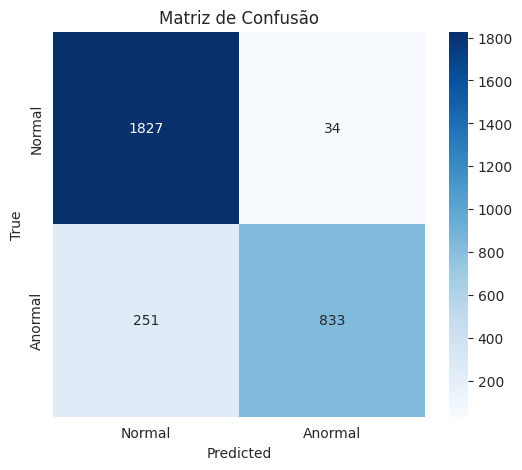

In [186]:
#Gerando a matriz de confusão
cm = confusion_matrix(y_val_SVM, y_val_pred_SVM)

#Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anormal'], yticklabels=['Normal', 'Anormal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

####Contudo, para a análise do SVM-RBF, se destaca a **AUC-ROC** de 0.9414. Destacando, sobre a **Matriz de Confusão**:

*   **Verdadeiros Positivos** (VP): 1.827;
    * Número de pacientes pediátricos **COM** patologias cardíacas que foram **CORRETAMENTE** identificados pelo algoritmo;
*   **Falsos Negativos** (FN): 34;
    * Número de pacientes pediátricos **COM** patologias cardíacas que foram **INCORRETAMENTE** classificados como normais pelo algoritmo;
*   **Falsos Positivos** (FP): 251;
    * Número de pacientes pediátricos **SEM** patologias cardíacas que foram **INCORRETAMENTE** classificados como anormais pelo algoritmo;
*   **Verdadeiros Negativos** (VN): 833;
    * Número de pacientes pediátricos **SEM** patologias cardíacas que foram **CORRETAMENTE** identificados como normais pelo algoritmo.



###[Conclusão] Desses 5 algoritmos aplicados, o algoritmo da **RNA** foi o que mais retornou **resultados satisfatórios**.

##Algoritmos adicionais e *Kaggle*

###Foi feita uma seleção de alguns outros algoritmos que pudessem **desempenhar** de forma **eficiente**

###Aplicação do ***Gradient Boosting Classifier***

In [187]:
from sklearn.ensemble import GradientBoostingClassifier

#Merge do treino
Treino_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Treino["Id"])]
Treino_Completo = Treino_Completo.merge(Base_Treino, on="Id", how="left")

#Separar variáveis independentes e dependentes
X = Treino_Completo.drop(columns=["Id", "CLASSE"])
y = Treino_Completo["CLASSE"]

#Mapear as classes para valores binários
y = y.map({"Normal": 0, "Anormal": 1})

#Substituir valores infinitos e NaN nos dados de treino
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max().max(), inplace=True)

#Normalizar os dados com RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#Configuração do modelo GradientBoostingClassifier
gb = GradientBoostingClassifier(
    n_estimators=500,      # Número de árvores
    learning_rate=0.05,    # Taxa de aprendizado
    max_depth=6,           # Profundidade máxima das árvores
    subsample=0.8,         # Fração dos dados usada em cada iteração
    random_state=42
)

#Validação cruzada com StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

for train_idx, val_idx in cv.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    #Treinar o modelo
    gb.fit(X_train, y_train)

    #Previsão das probabilidades
    y_val_pred = gb.predict_proba(X_val)[:, 1]

    #Calcular a AUC-ROC
    auc = roc_auc_score(y_val, y_val_pred)
    auc_scores.append(auc)

print(f"AUC-ROC média na validação cruzada: {np.mean(auc_scores):.4f}")

#Preparar os dados de teste
X_test = Base_Principal[Base_Principal["Id"].isin(Base_Teste["Id"])]
X_test = X_test.drop(columns=["Id"])
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.max().max(), inplace=True)

#Normalizar os dados de teste
X_test_scaled = scaler.transform(X_test)

#Fazer previsões no conjunto de teste
y_test_pred = gb.predict_proba(X_test_scaled)[:, 1]

#Criar DataFrame para submissão
submission = pd.DataFrame({
    "Id": Base_Teste["Id"],
    "Predicted": y_test_pred
})

#Salvar arquivo CSV para submissão no Kaggle
submission.to_csv("submission.csv", index=False)

print("Arquivo submission.csv gerado com sucesso!")


AUC-ROC média na validação cruzada: 0.9516
Arquivo submission.csv gerado com sucesso!


####O ***Gradient Boosting Classifier*** apresentou uma **AUC-ROC** de 0.9528.

###Aplicação do ***Random Forest***

In [188]:
from sklearn.ensemble import RandomForestClassifier

#Merge do treino
Treino_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Treino["Id"])]
Treino_Completo = Treino_Completo.merge(Base_Treino, on="Id", how="left")

#Separar variáveis independentes e dependentes
X = Treino_Completo.drop(columns=["Id", "CLASSE"])
y = Treino_Completo["CLASSE"]

#Mapear as classes para valores binários
y = y.map({"Normal": 0, "Anormal": 1})

#Substituir valores infinitos e NaN nos dados de treino
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max().max(), inplace=True)

#Normalizar os dados com RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#Configuração do Random Forest
rf = RandomForestClassifier(
    n_estimators=300,               #Número de árvores
    max_depth=10,                   #Profundidade máxima das árvores
    random_state=42,
    class_weight="balanced",        #Balancear as classes
)

#Validação cruzada com StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
auc_scores_rf = []

for train_idx, val_idx in cv.split(X_scaled, y):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    #Treinar o modelo
    rf.fit(X_train, y_train)

    #Previsão das probabilidades para o conjunto de validação
    y_val_pred = rf.predict_proba(X_val)[:, 1]

    #Calcular a AUC-ROC
    auc = roc_auc_score(y_val, y_val_pred)
    auc_scores_rf.append(auc)

print(f"AUC-ROC média no Random Forest: {np.mean(auc_scores_rf):.4f}")

#Preparar os dados de teste
Teste_Completo = Base_Principal[Base_Principal["Id"].isin(Base_Teste["Id"])]
X_teste = Teste_Completo.drop(columns=["Id"])

#Substituir valores infinitos e NaN nos dados de teste
X_teste.replace([np.inf, -np.inf], np.nan, inplace=True)
X_teste.fillna(X_teste.max().max(), inplace=True)

#Normalizar os dados de teste
X_teste_scaled = scaler.transform(X_teste)

#Prever as probabilidades para o conjunto de teste
y_teste_prob = rf.predict_proba(X_teste_scaled)[:, 1]

#Criar o arquivo de submissão
submissao = Teste_Completo[["Id"]].copy()
submissao["Predicted"] = y_teste_prob
submissao.to_csv("submissao_random_forest.csv", index=False)

print("Submissão salva como 'submissao_random_forest.csv'")

AUC-ROC média no Random Forest: 0.9551
Submissão salva como 'submissao_random_forest.csv'


####A ***Random Forest*** retornou uma AUC-ROC de 0.9551.

###Esses dois últimos algoritmos apresentaram resultados muito elevados, superando até a **RNA**. Porém, foi decidido que mesmo assim, a **RNA** seria o algoritmo a ser mais explorado para a competição do *Kaggle*, por apresentar resultados mais elevados na **COMPETIÇÃO**. Resultados obtidos na COMPETIÇÃO (em ordem cronológica de submissão):

*   <u>KNN</u>: 0.92709 - `Número de K-vizinhos = 5` [***StratifiedKFold***, **n_splits = 5**] [***StandardScaler***] | (1ª submissão);
*   <u>SVM</u>: 0.92533 - `Kernel RBF` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (2ª submissão);
*   <u>RNA</u>: 0.93292 - `2 camadas ocultas (100, 50), ReLU, Adam e 200 iterações` [***StandardScaler***] | (3ª submissão);
*   <u>RNA (PCA)</u>: 0.92987 - `Número de componentes = 0.95` [Mantendo 95% da variância] [***StandardScaler***] | (4ª submissão);
*   <u>RNA Otimizada</u>: 0.94215 - `3 camadas ocultas (128, 64, 32), ReLU, Adam e 500 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (5ª submissão);
*   <u>RNA Otimizada 2</u>: 0.94166 - `3 camadas ocultas (256, 128, 64), ReLU, Adam e 800 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (6ª submissão);
*   <u>RNA Otimizada (Smote)</u>: 0.93346 - `3 camadas ocultas (512, 256, 128), ReLU, Adam e 1000 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (7ª submissão);
*   <u>Random Forest</u>: 0.93938 - `n_estimators = 300` [***StratifiedKFold***, **n_splits = 10**] [***RobustScaler***]  | (8ª submissão);
*   <u>RNA Otimizada 3</u>: 0.93902 - `3 camadas ocultas (128, 64, 32), ReLU, Adam e 2000 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (9ª submissão);
*   <u>Regressão Logística</u>: 0.93394 - `penalty = l2 e solver = "liblinear"` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (10ª submissão);
*   <u>RNA Otimizada 4</u>: 0.93972 - `3 camadas ocultas (512, 256, 128), ReLU, Adam e 3000 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (11ª submissão);
*   <u>RNA Otimizada 5</u>: 0.93874 - `3 camadas ocultas (512, 256, 128), ReLU, Adam e 3000 iterações` [***StratifiedKFold***, **n_splits = 5**] [***StandardScaler***] | (12ª submissão);
*   <u>RNA Otimizada 6</u>: 0.94215 - `3 camadas ocultas (128, 64, 32), ReLU, Adam e 500 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (13ª submissão);
*   <u>RNA Otimizada 7</u>: 0.94341 - `3 camadas ocultas (256, 128, 64), tanh, Adam e 500 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (14ª submissão);
*   <u>Naive Bayes</u>: 0.93411 - [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (15ª submissão);
*   <u>RNA Otimizada 8</u>: 0.94096 - `3 camadas ocultas (256, 128, 64), tanh, Adam e 500 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (16ª submissão);
*   <u>RNA Otimizada 9</u>: 0.93762 - `3 camadas ocultas (256, 128, 64), tanh, Adam e 500 iterações` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (17ª submissão);
*   <u>Gradient Boosting Classifier</u>: 0.50202 - `n_estimators = 500` [***StratifiedKFold***, **n_splits = 5**] [***RobustScaler***] | (18ª submissão);
*   <u>RNA Otimizada 10</u>: 0.93679 - `3 camadas ocultas (512, 256, 128), tanh, Adam e 500 iterações` [***StratifiedKFold***, **n_splits = 10**] [***RobustScaler***] | (19ª submissão).




###Conclusão, os algoritmos de **RNA** foram os que, em algum momento, apresentou um melhor desempenho **inédito**, por isso justificando novamente sua exploração e seu número maior de submissões na **competição** do *Kaggle*.